## Enunciado

> Considere la información del proyecto cuya información aparece en la tabla adjunta:
> 1. ¿Cuál es la probabilidad de terminar el proyecto entre 7 y 9 periodos?
> 2. Indique cuales serían las actuaciones a llevar a cabo para reducir con mínimo sobrecoste la duración media del proyecto a 6 periodos. 
> 3. Indique cuales serían las actuaciones para poder ejecutar el proyecto con un límite en los recursos de 8 recursos por periodo durante los primeros cuatro periodos.
> 4. Calcule el valor del CPI y del SPI para el punto de control de 8 periodos. 


In [1]:
# Alargamos el ancho de las celdas al 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import pandas as pd
import numpy as np

datos_enunciado = pd.DataFrame([
#  actividad, precedentes, duracion, duracion_tope, desviación, coste_planificado, coste_real, duracion_real, realizado, cur, recursos
     ('A',      '---  ',       2,         1,              0.2,         60,              80,          2,           100,   80,    4 ),
     ('B',      'A    ',       2,         1,              0.3,         70,              60,          2,            80,   10,    2 ),  
     ('C',      'B    ',       3,         1,              0.4,         50,               0,          0,             0,   40,    1 ),
     ('D',      '---  ',       4,         3,              0.5,         40,              50,          5,           100,   20,    4 ),
     ('E',      'A    ',       1,         1,              0.1,         30,              30,          3,           100,   30,    3 ), 
     ('F',      'D,E  ',       2,         1,              0.3,         10,              10,          3,            80,   40,    5 ),
     ('G',      '---  ',       1,         1,              0.1,         40,              50,          3,           100,   20,    4 ),
     ('H',      'G    ',       4,         2,              0.5,        110,             140,          4,            90,   50,    2 ),
     ('I',      'D    ',       1,         1,              0.1,         90,              70,          1,            50,   60,    3 ),
     ('J',      'H,I,K',       2,         1,              0.4,         50,               0,          0,             0,   70,    1 ),
     ('K',      'D,G  ',       2,         1,              0.2,         40,              30,          2,            60,   90,    2 ),
     ('L',      'H,K  ',       2,         1,              0.2,         30,               0,          0,             0,   10,    3 ),
] ,columns=['actividad', 'precedentes', 'duracion', 'duracion_tope', 'desviacion', 'coste_planificado', 'coste_real',
            'duracion_real', 'realizado', 'cur', 'recursos']).set_index('actividad')
datos_enunciado

,precedentes,duracion,duracion_tope,desviacion,coste_planificado,coste_real,duracion_real,realizado,cur,recursos
actividad,,,,,,,,,,
A,---,2,1,0.2,60,80,2,100,80,4
B,A,2,1,0.3,70,60,2,80,10,2
C,B,3,1,0.4,50,0,0,0,40,1
D,---,4,3,0.5,40,50,5,100,20,4
E,A,1,1,0.1,30,30,3,100,30,3
F,"D,E",2,1,0.3,10,10,3,80,40,5
G,---,1,1,0.1,40,50,3,100,20,4
H,G,4,2,0.5,110,140,4,90,50,2
I,D,1,1,0.1,90,70,1,50,60,3


## Solución
### Apartado 1

> ¿Cuál es la probabilidad de terminar el proyecto entre 7 y 9 semanas?


#### Duración media del proyecto

En pmule (project management at ULE) está el código que utilizamos para calcular los valores del PERT.

In [4]:
from pmule import encadenamientos, GrafoProyecto

In [5]:
encadenamientos(datos_enunciado.precedentes)

actividad,A,B,C,D,E,F,G,H,I,J,K,L
actividad,,,,,,,,,,,,
A,,,,,,,,,,,,
B,True,,,,,,,,,,,
C,,True,,,,,,,,,,
D,,,,,,,,,,,,
E,True,,,,,,,,,,,
F,,,,True,True,,,,,,,
G,,,,,,,,,,,,
H,,,,,,,True,,,,,
I,,,,True,,,,,,,,


La clase PertGraph permite visualizar el grafo PERT, el diagrama de Gantt así como realizar el cálculo de tiempos tempranos, tardíos y de las holguras totales.

In [3]:
aristas = pd.DataFrame([
# actividad, nodo_inicial, nodo_final
  (  'A',           1,         2       ),
  (  'B',           2,         9       ),
  (  'C',           9,         10      ),
  (  'D',           1,         3       ),
  (  'E',           2,         6       ),
  (  'F',           6,         10      ),
  (  'G',           1,         4       ),
  (  'H',           4,         7       ),
  (  'I',           3,         8       ),
  (  'J',           8,        10       ),
  (  'K',           5,         7       ),
  (  'L',           7,        10       ),
  ( 'f1',           3,         6       ),
  ( 'f2',           3,         5       ),   
  ( 'f3',           4,         5       ),
  ( 'f4',           7,         8       ),
] ,columns=['actividad', 'nodo_inicial', 'nodo_final']).set_index('actividad')
datos_proyecto = pd.concat([datos_enunciado, aristas], axis=1, sort=False).set_index(aristas.index).fillna(0)
datos_proyecto

,precedentes,duracion,duracion_tope,desviacion,coste_planificado,coste_real,duracion_real,realizado,cur,recursos,nodo_inicial,nodo_final
actividad,,,,,,,,,,,,
A,---,2.0,1.0,0.2,60.0,80.0,2.0,100.0,80.0,4.0,1,2
B,A,2.0,1.0,0.3,70.0,60.0,2.0,80.0,10.0,2.0,2,9
C,B,3.0,1.0,0.4,50.0,0.0,0.0,0.0,40.0,1.0,9,10
D,---,4.0,3.0,0.5,40.0,50.0,5.0,100.0,20.0,4.0,1,3
E,A,1.0,1.0,0.1,30.0,30.0,3.0,100.0,30.0,3.0,2,6
F,"D,E",2.0,1.0,0.3,10.0,10.0,3.0,80.0,40.0,5.0,6,10
G,---,1.0,1.0,0.1,40.0,50.0,3.0,100.0,20.0,4.0,1,4
H,G,4.0,2.0,0.5,110.0,140.0,4.0,90.0,50.0,2.0,4,7
I,D,1.0,1.0,0.1,90.0,70.0,1.0,50.0,60.0,3.0,3,8


##### Grafo PERT con numeración de nodos

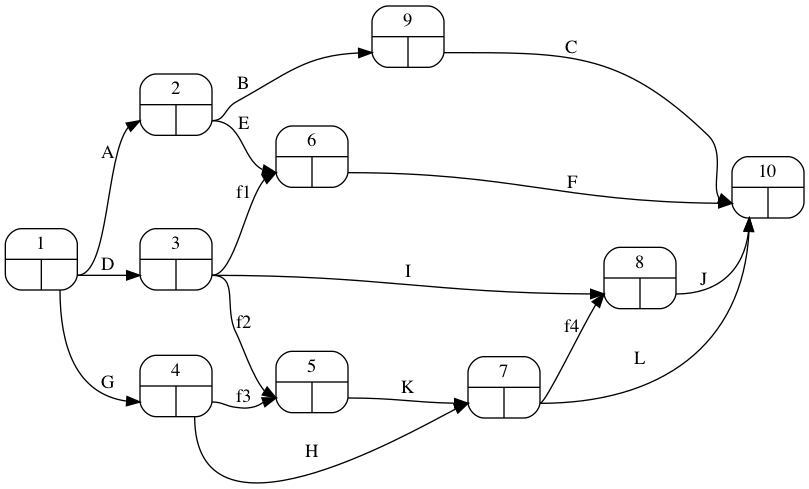

In [4]:
proyecto = GrafoProyecto(datos_proyecto)
proyecto.pert(duraciones=False)

##### Matriz de Zaderenko 

In [5]:
proyecto.resolver_zaderenko()

,1,2,3,4,5,6,7,8,9,10,temprano
1,,2,4,1,,,,,,,0
2,,,,,,1,,,2,,2
3,,,,,0,0,,1,,,4
4,,,,,0,,4,,,,1
5,,,,,,,2,,,,4
6,,,,,,,,,,2,4
7,,,,,,,,0,,2,6
8,,,,,,,,,,2,6
9,,,,,,,,,,3,4
10,,,,,,,,,,,8


In [6]:
resultados_pert = proyecto.calcula_pert()
resultados_pert['nodos']

,tempranos,tardios
1,0.0,0.0
4,1.0,2.0
3,4.0,4.0
5,4.0,4.0
7,6.0,6.0
8,6.0,6.0
2,2.0,3.0
6,4.0,6.0
9,4.0,5.0
10,8.0,8.0


##### Duración media del proyecto

La duración media del proyecto es:

In [7]:
duracion_media_proyecto = proyecto.duracion_proyecto()
duracion_media_proyecto

8.0

#### Varianza de la duración del proyecto
Para determinar la varianza de la duración del proyecto es necesario determinar la varianza de cada rama del camino crítico.

##### Holguras

In [8]:
resultados_pert['actividades'][['H_total']]

,H_total
A,1.0
D,0.0
G,1.0
B,1.0
E,3.0
I,1.0
f1,2.0
f2,0.0
H,1.0
f3,3.0


##### Camino crítico

In [9]:
camino_critico = proyecto.camino_critico()
camino_critico

Index(['D', 'f2', 'K', 'L', 'f4', 'J'], dtype='object')

##### Grafo PERT con indicación del camino crítico

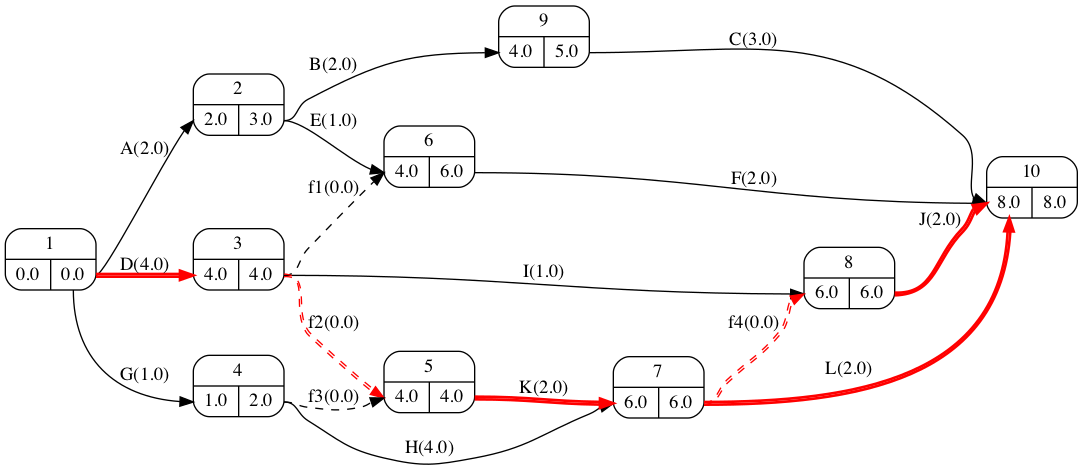

In [10]:
proyecto.pert()

##### Desviación del proyecto

A la vista del grafo PERT el camino crítico se compone de 2 ramas.

In [11]:
rama_1 = ['D', 'f2', 'K', 'f4', 'J']
rama_2 = ['D', 'f2', 'K', 'L']

In [12]:
desviacion_proyecto = proyecto.desviacion_proyecto(rama_1, rama_2)

Desviación rama: D-f2-K-f4-J : 0.6708203932499369
Desviación rama: D-f2-K-L : 0.574456264653803
Desviación del proyecto: 0.6708203932499369


#### Probabilidad de terminar entre 7 y 9 periodos

In [13]:
import scipy
from scipy.stats import norm

probabilidad_de_terminar_antes_de_9 = norm.cdf(9, loc=duracion_media_proyecto, scale=desviacion_proyecto)
probabilidad_de_terminar_antes_de_7 = norm.cdf(7, loc=duracion_media_proyecto, scale=desviacion_proyecto)

probabilidad_de_terminar_entre_7_y_9 = probabilidad_de_terminar_antes_de_9 - probabilidad_de_terminar_antes_de_7
probabilidad_de_terminar_entre_7_y_9 * 100

86.39628718858563

### Apartado 2
> Indique cuales serían las actuaciones a llevar a cabo para reducir con mínimo sobrecoste la duración media del proyecto a 6 periodos. 

#### Reducción a 6 periodos

##### Situación inicial de partida

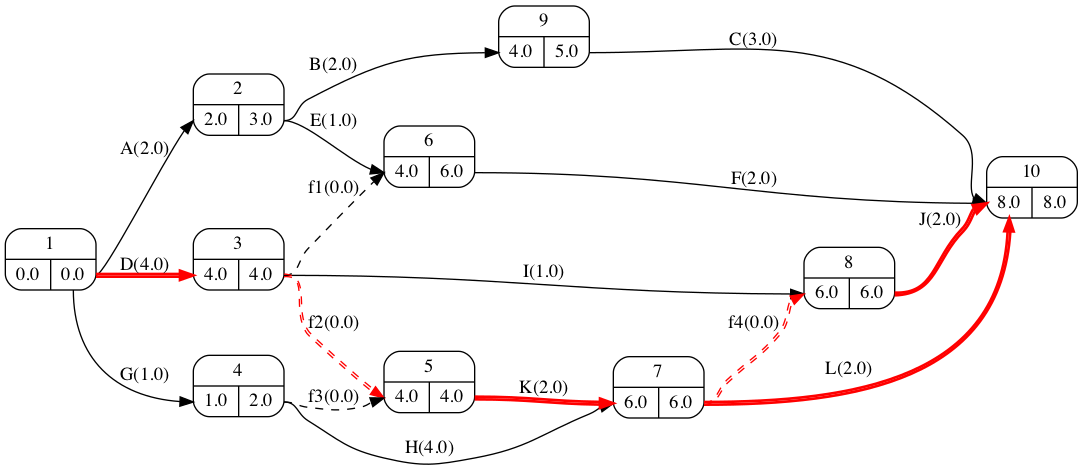

In [14]:
proyecto.pert()

Para analizar el efecto de la reducción de la duración usaremos una nueva matriz para almacenar los datos de las duraciones:


In [15]:
proyecto_reduccion = proyecto.copy()

##### Primera reducción de la duración del proyecto en un periodo

Analizamos los costes unitarios de reducción y la capacidad de reducción de las actividades en cada rama del camino crítico.

###### Análisis rama 1

In [16]:
proyecto_reduccion.cur_ordenado(rama_1)

,cur,duracion,duracion_tope
actividad,,,
f2,0.0,0.0,0.0
f4,0.0,0.0,0.0
D,20.0,4.0,3.0
J,70.0,2.0,1.0
K,90.0,2.0,1.0


En la rama 1 la actividad reducible más barata es la D. Además es común a las dos ramas.

###### Análisis rama 2

In [17]:
proyecto_reduccion.cur_ordenado(rama_2)

,cur,duracion,duracion_tope
actividad,,,
f2,0.0,0.0,0.0
L,10.0,2.0,1.0
D,20.0,4.0,3.0
K,90.0,2.0,1.0


En la rama 2 la actividad reducible más barata es la L.

###### Reducción de actividades en la primera iteración.

Se propone reducir un periodo la actividad D por ser común a las dos ramas. El coste asociado a esta reducción es:

In [18]:
proyecto_reduccion.reducir(D=1)

Sobrecoste de la reducción: 20.0


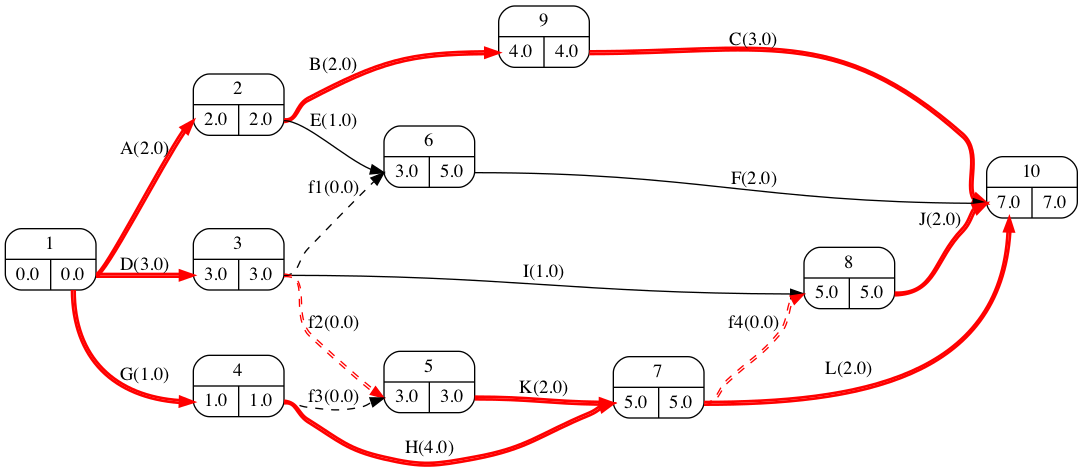

In [19]:
proyecto_reduccion.pert()

Tras esta reducción el camino critico consta de ramas nuevas:

In [20]:
rama_3 = ['A', 'B', 'C']
rama_4 = ['G', 'H', 'f4', 'J']
rama_5 = ['G', 'H', 'L']

##### Segunda reducción de la duración del proyecto en un periodo

###### Análisis rama 1

In [21]:
proyecto_reduccion.cur_ordenado(rama_1)

,cur,duracion,duracion_tope
actividad,,,
f2,0.0,0.0,0.0
f4,0.0,0.0,0.0
D,20.0,3.0,3.0
J,70.0,2.0,1.0
K,90.0,2.0,1.0


En la rama 1 la actividad reducible más baratas es la J. Esta actividad es común con la rama 4.

###### Análisis rama 2

In [22]:
proyecto_reduccion.cur_ordenado(rama_2)

,cur,duracion,duracion_tope
actividad,,,
f2,0.0,0.0,0.0
L,10.0,2.0,1.0
D,20.0,3.0,3.0
K,90.0,2.0,1.0


En la rama 2 la actividad reducible más barata es la L. Esta rama es común con la rama 5.

###### Análisis rama 3

In [23]:
proyecto_reduccion.cur_ordenado(rama_3)

,cur,duracion,duracion_tope
actividad,,,
B,10.0,2.0,1.0
C,40.0,3.0,1.0
A,80.0,2.0,1.0


En la rama 3 la actividad reducible más barata es la B.

###### Análisis rama 4

In [24]:
proyecto_reduccion.cur_ordenado(rama_4)

,cur,duracion,duracion_tope
actividad,,,
f4,0.0,0.0,0.0
G,20.0,1.0,1.0
H,50.0,4.0,2.0
J,70.0,2.0,1.0


En la rama 4 la actividad reducible más barata es la H. Sin embargo la J ya se va a reducir en la rama 1.

###### Análisis rama 5

In [25]:
proyecto_reduccion.cur_ordenado(rama_5)

,cur,duracion,duracion_tope
actividad,,,
L,10.0,2.0,1.0
G,20.0,1.0,1.0
H,50.0,4.0,2.0


En la rama 5 la actividad reducible más barata es la L. Además esta actividad es común con la rama 2.

###### Reducción de actividades en la segunda iteración.

Se propone reducir un periodo las actividades J, B y L. El coste asociado a tal reducción es:

In [26]:
proyecto_reduccion.reducir(J=1, B=1, L=1)

Sobrecoste de la reducción: 90.0


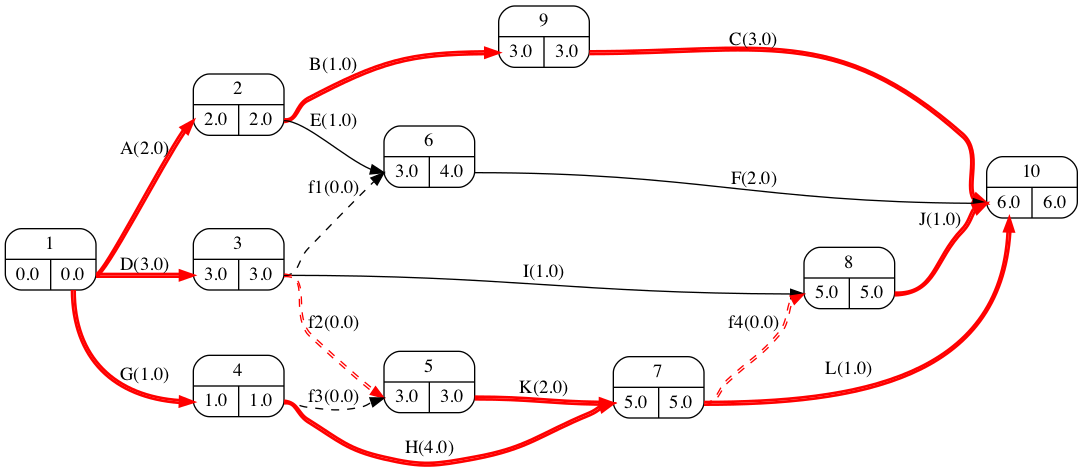

In [27]:
proyecto_reduccion.pert()

### Apartado 3
> Indique cuales serían las actuaciones para poder ejecutar el proyecto con un límite en los recursos de 8 recursos por periodo durante los primeros cuatro periodos.

Para responder este apartado es necesario representar la demanda de recursos a lo largo del tiempo.

In [28]:
proyecto_asignacion = proyecto.copy()
proyecto_asignacion.gantt(representar = 'recursos', total='fila', holguras = True)

,1,2,3,4,5,6,7,8,H_total
A,4,4,,,,,,,1
B,,,2,2,,,,,1
C,,,,,1,1,1,,1
D,4,4,4,4,,,,,0
E,,,3,,,,,,3
F,,,,,5,5,,,2
G,4,,,,,,,,1
H,,2,2,2,2,,,,1
I,,,,,3,,,,1
J,,,,,,,1,1,0


La demanda de recursos actual infringe el límite impuesto. Es necesario aplicar el algoritmo de asignación.

#### Algoritmo de asignación

 El primer periodo problemático es el 1.

##### Asignación periodo 1

De las actividades inicialmente programadas para el periodo 1 la actividad D es crítica y se programa consumiendo 4 recursos. Las actividades A y G empatan en holgura y por tanto se programa la más corta (G) desplazando la actividad A.

In [29]:
proyecto_asignacion.desplazar(A = 1, mostrar='recursos')

,1,2,3,4,5,6,7,8,H_total
A,,4,4,,,,,,0
B,,,,2,2,,,,0
C,,,,,,1,1,1,0
D,4,4,4,4,,,,,0
E,,,,3,,,,,2
F,,,,,5,5,,,2
G,4,,,,,,,,1
H,,2,2,2,2,,,,1
I,,,,,3,,,,1
J,,,,,,,1,1,0


##### Asignación periodo 2

De las actividades inicialmente programadas para el periodo 2 la actividad D ya se está ejecutando y no se interrumpe. La actividad A se ha convertido en crítica y por tanto se desplaza la actividad H.

In [30]:
proyecto_asignacion.desplazar(H = 1, mostrar='recursos')

,1,2,3,4,5,6,7,8,H_total
A,,4,4,,,,,,0
B,,,,2,2,,,,0
C,,,,,,1,1,1,0
D,4,4,4,4,,,,,0
E,,,,3,,,,,2
F,,,,,5,5,,,2
G,4,,,,,,,,0
H,,,2,2,2,2,,,0
I,,,,,3,,,,1
J,,,,,,,1,1,0


##### Asignación periodo 3

Durante el periodo tres se continuan ejecutando las actividades en ejecución A y D.

In [31]:
proyecto_asignacion.desplazar(H = 1, mostrar='recursos')

,1,2,3,4,5,6,7,8,9,H_total
A,,4,4,,,,,,,1
B,,,,2,2,,,,,1
C,,,,,,1,1,1,,1
D,4,4,4,4,,,,,,1
E,,,,3,,,,,,3
F,,,,,5,5,,,,3
G,4,,,,,,,,,0
H,,,,2,2,2,2,,,0
I,,,,,3,,,,,2
J,,,,,,,,1,1,0


##### Asignación periodo 4

Durante el periodo cuatro D continua su ejecución. Atendiendo a las holguras se programa la ejecución para este periodo de H y B, desplazando E.

In [32]:
proyecto_asignacion.desplazar(E = 1, mostrar='recursos')

,1,2,3,4,5,6,7,8,9,H_total
A,,4,4,,,,,,,1
B,,,,2,2,,,,,1
C,,,,,,1,1,1,,1
D,4,4,4,4,,,,,,1
E,,,,,3,,,,,2
F,,,,,,5,5,,,2
G,4,,,,,,,,,0
H,,,,2,2,2,2,,,0
I,,,,,3,,,,,2
J,,,,,,,,1,1,0


### Apartado 4
> Calcule el valor del CPI y del SPI para el punto de control de 8 periodos. 


In [33]:
PV = datos_proyecto['coste_planificado'].sum()
PV

620.0

In [34]:
EV = datos_proyecto.eval('coste_planificado * realizado / 100').sum()
EV

402.0

In [35]:
AC = datos_proyecto['coste_real'].sum()
AC

520.0

In [36]:
CPI = EV/AC
CPI

0.7730769230769231

In [37]:
SPI=EV/PV
SPI

0.6483870967741936